# Part 1: Feature Normalization

## 1-1 Load Data and Print

In [1]:
import numpy as np
print("Loading data...")

# load data
data = np.loadtxt("ex1data2.txt", delimiter=",")
X = np.array(data[:, :2])
Y = np.array(data[:, 2:])
m = len(Y)
# print out some data points
print("first 10 examples from the dataset:")
print(X[1:10, :])
print("-----------------------------------")
print(Y[1:10, :])

Loading data...
first 10 examples from the dataset:
[[1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]
-----------------------------------
[[329900.]
 [369000.]
 [232000.]
 [539900.]
 [299900.]
 [314900.]
 [198999.]
 [212000.]
 [242500.]]


## 1-2 The implementation of Feature Normalize 

In [2]:
def feature_normalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

## 1-3 Normalizing Feature

In [3]:
X, mu, sigma = feature_normalize(X)

# Part 2: Gradient Descent

## 2-1 Setting the parameters of Grandient Descent

In [4]:
alpha = 0.01
num_iters = 1000
theta = np.zeros([3, 1])
X = np.hstack((np.ones([m, 1], dtype=float),X))

## 2-2 The implements of Grandient Descent and Cost Function for multiple variables

In [5]:
# cost function for multiple variables
def compute_cost_multiple(X, Y, theta):
    m = len(Y) # number of training examples
    J = np.dot((np.dot(X, theta)-Y).T, (np.dot(X, theta)-Y)) / (2*m)
    return J

# gradient descent for multiple variables
def gradient_descent_multiple(X, Y, theta, alpha, iters):
    m = len(Y) # number of training examples
    J_history = np.zeros([iters, 1])

    for i in range(0, iters):
        theta = theta - alpha/m * np.dot(X.T, (np.dot(X, theta)-Y))
        J_history[i, 0] = compute_cost_multiple(X, Y, theta)
    return J_history, theta

## 2-3 Run and Plot convergence Graph

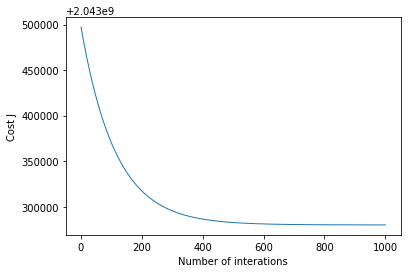

In [7]:
# run 
J_history, theta = gradient_descent_multiple(X, Y, theta, alpha, num_iters)
# plot the convergence graph
import matplotlib.pyplot as plt
plt.plot(np.linspace(1, 1000, 1000), J_history, linewidth=1)
plt.xlabel("Number of interations")
plt.ylabel("Cost J")
plt.show()

## 2-4 Display gradient descent's result

In [8]:
print("Theta computed form gradient descent:")
print(theta)

Theta computed form gradient descent:
[[340412.65894002]
 [109439.22578243]
 [ -6569.78416695]]


## 2-5 Estimate the price of a 1650 sq-ft, 3 br house

In [9]:
tempX = (np.array([[1650, 3]]) - mu) / sigma
price = np.dot(np.hstack((np.ones([1, 1]), tempX)), theta)
print("Predicted price of a 1650 sq-ft, 3 br house(using gradient descent): " + str(price))

Predicted price of a 1650 sq-ft, 3 br house(using gradient descent): [[293083.34882732]]


# Part 3: Normal Equations

## 3-1 Load data

In [10]:
print("Solving with normal equations...")
# load data
data = np.loadtxt("ex1data2.txt", delimiter=",")
X = np.array(data[:, :2])
Y = np.array(data[:, 2:])
m = len(Y)
# add intercept term to X
X = np.hstack((np.ones([m, 1]), X))

Solving with normal equations...


## 3-2 The implement of Normal Equations

In [11]:
def normal_equation(X, Y):
    theta = np.zeros([np.size(X, axis=1), 1])
    print(theta.shape)
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)                   
    return theta

## 3-3 Calculate the parameters from the normal equation and Display

In [12]:
# calculate
theta = normal_equation(X, Y)
# display
print("Theta computed from the normal equations:")
print(theta)

(3, 1)
Theta computed from the normal equations:
[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


## 3-4 Estimate the price of a 1650 sq-ft, 3 br house

In [13]:
tempX = np.array([[1, 1650, 3]])
price = np.dot(tempX, theta)
print("Predicted price of a 1650 sq-ft, 3 br house(using gradient descent): " + str(price))

Predicted price of a 1650 sq-ft, 3 br house(using gradient descent): [[293081.4643349]]
